In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from definitions import TALOS_DIR
from app.preprocessing import load_dataset,preprocess_data
from app.models import load_model


Using TensorFlow backend.


In [2]:
data = load_dataset(load_from_pickle=True, input_ins='as_tf_idf')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


In [3]:
# 70% Train & 10% HeldOut & 20% Test
model_data_tf = preprocess_data(data, 'tags', 'post',
                                input_ins='as_tf_idf',
                                cv_split_full=0.2,
                                cv_split_dev=0.125)


In [4]:
'''Use the test filename if ypu don't want to delete
    # your current logs from the previous run.'''
TALOS_TF_LOG_FILENAME = 'talos_tf_log'
talos_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_TF_LOG_FILENAME)

###### Production configuration
tf_idf_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [64, 128],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'epochs': [20,30],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=0.2,
                               print_params=True,
                               seed=123,
                               last_epoch_value=True,
                               dataset_name=talos_tf_log_pathname
                               )

  0%|          | 0/19 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


  5%|▌         | 1/19 [00:23<06:58, 23.23s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 11%|█         | 2/19 [01:06<08:18, 29.33s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 16%|█▌        | 3/19 [01:46<08:38, 32.39s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 21%|██        | 4/19 [02:09<07:26, 29.76s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 26%|██▋       | 5/19 [02:32<06:27, 27.66s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 32%|███▏      | 6/19 [03:12<06:47, 31.36s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 37%|███▋      | 7/19 [03:48<06:33, 32.75s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 42%|████▏     | 8/19 [04:12<05:31, 30.16s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 47%|████▋     | 9/19 [04:36<04:42, 28.25s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 53%|█████▎    | 10/19 [05:00<04:02, 26.93s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 58%|█████▊    | 11/19 [05:15<03:06, 23.30s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 63%|██████▎   | 12/19 [05:27<02:19, 19.95s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 68%|██████▊   | 13/19 [05:53<02:10, 21.82s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 74%|███████▎  | 14/19 [06:15<01:49, 21.83s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 79%|███████▉  | 15/19 [06:32<01:21, 20.30s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 84%|████████▍ | 16/19 [06:59<01:07, 22.41s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 89%|████████▉ | 17/19 [07:34<00:52, 26.14s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 95%|█████████▍| 18/19 [08:10<00:29, 29.06s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


100%|██████████| 19/19 [08:31<00:00, 26.74s/it]


In [5]:
report_tf = ta.Reporting(history_model_tf_idf)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 3,
 'val_loss': 0.5518563627004623,
 'val_f1': 0.829124225616455,
 'val_categorical_accuracy': 0.82325,
 'loss': 0.32504649888617654,
 'f1': 0.8944577184404645,
 'categorical_accuracy': 0.9028214285714286,
 'visualize_proccess': 'False',
 'first_neuron': 128,
 'activation': 'tanh',
 'dropout': 0.2,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'epochs': 30,
 'batch_size': 32,
 'model_type': 'keras_tf_idf_model'}

In [6]:
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)

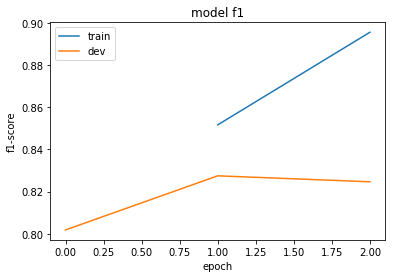

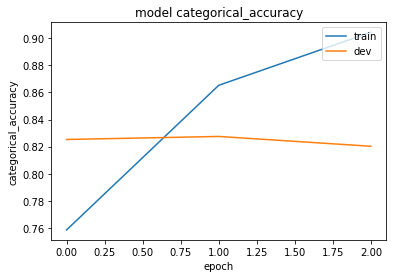

In [7]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)